In [26]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [27]:
#Loading the data
df = pd.read_csv('realtor-data.csv')

In [28]:
# Drop all rows with missing values to ensure clean and complete data for modeling
df = df.dropna()
# Display the number of missing (NaN) values in each column of the dataset
print(df.isnull().sum())

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64


In [29]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
3410,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,2012-10-12


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1084909 entries, 502 to 2226381
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   brokered_by     1084909 non-null  float64
 1   status          1084909 non-null  object 
 2   price           1084909 non-null  float64
 3   bed             1084909 non-null  float64
 4   bath            1084909 non-null  float64
 5   acre_lot        1084909 non-null  float64
 6   street          1084909 non-null  float64
 7   city            1084909 non-null  object 
 8   state           1084909 non-null  object 
 9   zip_code        1084909 non-null  float64
 10  house_size      1084909 non-null  float64
 11  prev_sold_date  1084909 non-null  object 
dtypes: float64(8), object(4)
memory usage: 107.6+ MB


In [31]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,1.084909e+06,1.084909e+06,1.084909e+06,1.084909e+06,1.084909e+06,1.084909e+06,1.084909e+06,1.084909e+06
mean,5.357678e+04,5.687041e+05,3.363451e+00,2.519739e+00,1.195407e+01,9.291065e+05,5.589184e+04,2.074974e+03
std,3.047812e+04,1.181611e+06,1.363310e+00,1.305497e+00,7.953078e+02,5.295896e+05,2.994955e+04,2.767609e+03
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,9.700000e+01,6.020000e+02,1.000000e+02
25%,2.425500e+04,2.400000e+05,3.000000e+00,2.000000e+00,1.400000e-01,4.688700e+05,3.022300e+04,1.347000e+03
50%,5.301600e+04,3.800000e+05,3.000000e+00,2.000000e+00,2.100000e-01,9.320000e+05,5.544600e+04,1.792000e+03
75%,7.922100e+04,6.000000e+05,4.000000e+00,3.000000e+00,4.100000e-01,1.388381e+06,8.521500e+04,2.438000e+03
max,1.101420e+05,5.150000e+08,4.440000e+02,2.220000e+02,1.000000e+05,2.001125e+06,9.990100e+04,1.560780e+06


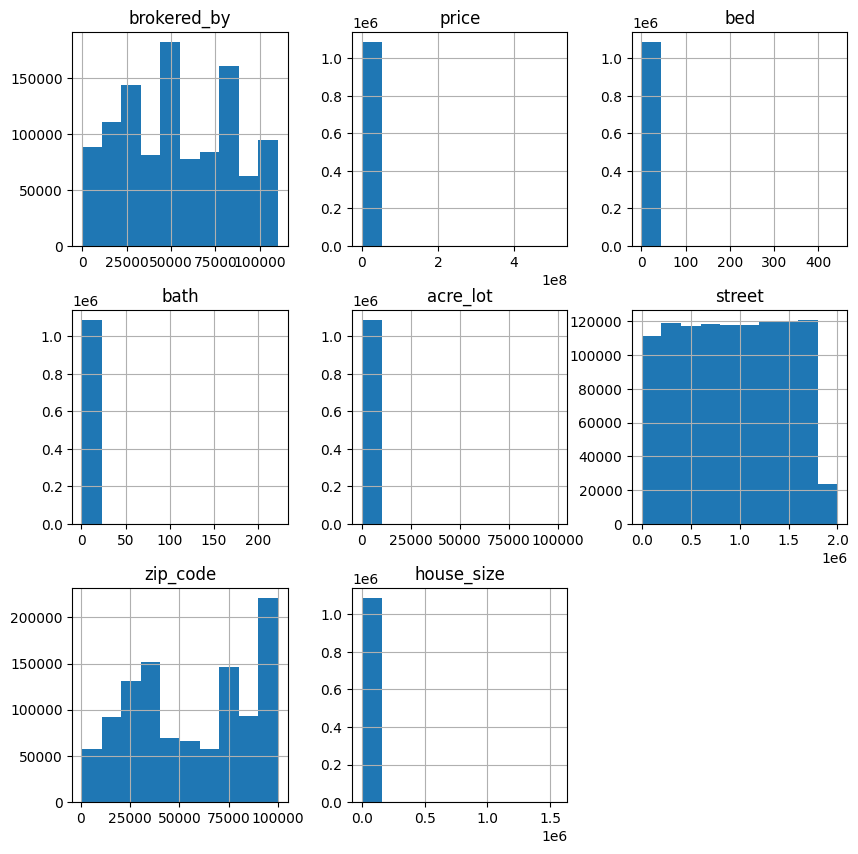

In [32]:
df.hist(figsize=(10, 10))
plt.show()

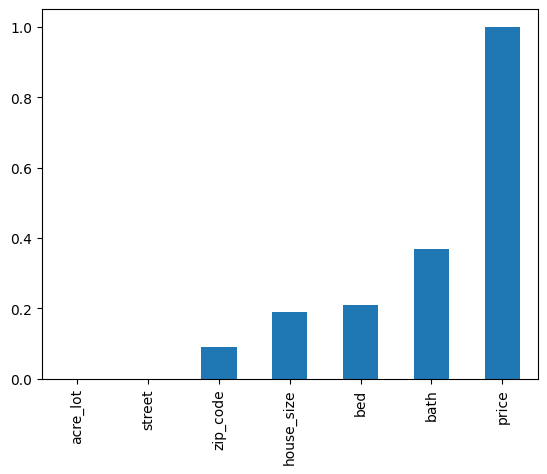

In [33]:
corr = df.corr(numeric_only=True).round(2)
corr['price'][1:].sort_values().plot(kind='bar')
plt.show()

Text(0, 0.5, 'Frequency')

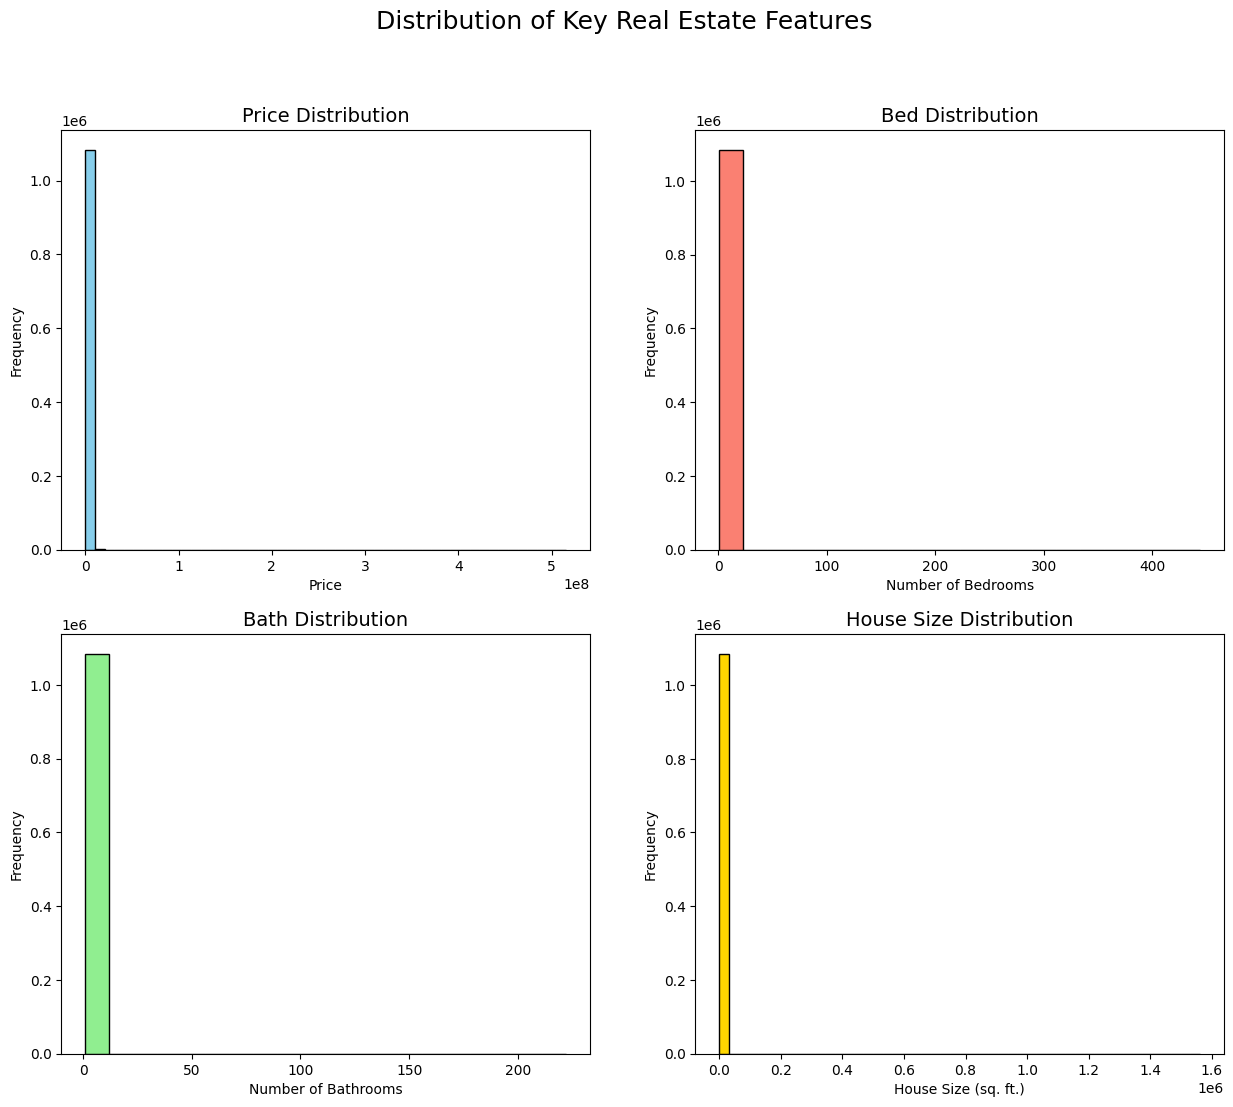

In [34]:
# Create a figure and a 2x2 grid of subplots for histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Distribution of Key Real Estate Features', fontsize=18)

# Plot histograms on each subplot
axes[0, 0].hist(df['price'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Price Distribution', fontsize=14)
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['bed'], bins=20, color='salmon', edgecolor='black')
axes[0, 1].set_title('Bed Distribution', fontsize=14)
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(df['bath'], bins=20, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Bath Distribution', fontsize=14)
axes[1, 0].set_xlabel('Number of Bathrooms')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df['house_size'], bins=50, color='gold', edgecolor='black')
axes[1, 1].set_title('House Size Distribution', fontsize=14)
axes[1, 1].set_xlabel('House Size (sq. ft.)')
axes[1, 1].set_ylabel('Frequency')

In [35]:
#Describe price baseline
print(df['price'].describe().round(2))

count    1.084909e+06
mean     5.687041e+05
std      1.181611e+06
min      1.000000e+00
25%      2.400000e+05
50%      3.800000e+05
75%      6.000000e+05
max      5.150000e+08
Name: price, dtype: float64


In [36]:
#Create price categories
bins = [0, 200000, 500000, 1000000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Luxury']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

print(df['price_category'].value_counts())

price_category
Medium    522401
High      260194
Low       201051
Luxury    101263
Name: count, dtype: int64


In [37]:
# Copy dataset
df_encoded = df.copy()

# Label encode high-cardinality columns
label_cols = ['city', 'state', 'street']
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-hot encode small categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=['status'], drop_first=True)

# Features & target
X = df_encoded.drop(['price', 'prev_sold_date', 'price_category'], axis=1)
y = df_encoded['price_category']

In [38]:
#Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
#Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# Train Logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [41]:
#Evaluate
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5901365090191814
              precision    recall  f1-score   support

        High       0.52      0.35      0.42     52039
         Low       0.65      0.37      0.48     40210
      Luxury       0.71      0.31      0.43     20253
      Medium       0.59      0.85      0.70    104480

    accuracy                           0.59    216982
   macro avg       0.62      0.47      0.51    216982
weighted avg       0.60      0.59      0.56    216982



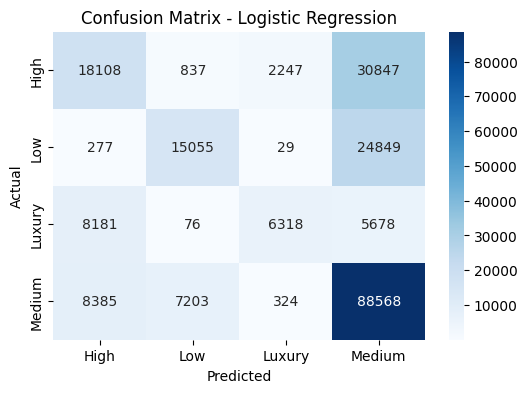

In [42]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=log_reg.classes_,
            yticklabels=log_reg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()